In [87]:
using Plots
include("datasetloader.jl")
include("ngrams.jl")

load_ngrams (generic function with 1 method)

In [2]:
counter=Dict{NTuple, Float64}()
ngrams("abcde", 3, counter)
ngrams("fff", 2, counter)

Dict{Tuple{Vararg{T, N}} where {N, T}, Float64} with 4 entries:
  (0x62, 0x63, 0x64) => 1.0
  (0x63, 0x64, 0x65) => 1.0
  (0x61, 0x62, 0x63) => 1.0
  (0x66, 0x66)       => 2.0

In [8]:
c2=ngrams(normalize_text("中国"), 2) + ngrams(normalize_text("中国"), 3)

Dict{Tuple{UInt8, UInt8, Vararg{UInt8}}, Float64} with 13 entries:
  (0x20, 0xe4, 0xb8) => 1.0
  (0xad, 0xe5, 0x9b) => 1.0
  (0xe5, 0x9b)       => 1.0
  (0x9b, 0xbd)       => 1.0
  (0xe5, 0x9b, 0xbd) => 1.0
  (0xb8, 0xad, 0xe5) => 1.0
  (0xbd, 0x20)       => 1.0
  (0xb8, 0xad)       => 1.0
  (0xe4, 0xb8)       => 1.0
  (0x20, 0xe4)       => 1.0
  (0xad, 0xe5)       => 1.0
  (0x9b, 0xbd, 0x20) => 1.0
  (0xe4, 0xb8, 0xad) => 1.0

In [72]:
dump_ngrams(2.1c2, "ct.txt")

In [73]:
load_ngrams("ct.txt")

Dict{Tuple{UInt8, UInt8, Vararg{UInt8}}, Float64} with 13 entries:
  (0xe5, 0x9b)       => 2.1
  (0xb8, 0xad, 0xe5) => 2.1
  (0xe4, 0xb8)       => 2.1
  (0x20, 0xe4)       => 2.1
  (0xad, 0xe5, 0x9b) => 2.1
  (0x9b, 0xbd)       => 2.1
  (0xe5, 0x9b, 0xbd) => 2.1
  (0xbd, 0x20)       => 2.1
  (0xb8, 0xad)       => 2.1
  (0xad, 0xe5)       => 2.1
  (0x9b, 0xbd, 0x20) => 2.1
  (0xe4, 0xb8, 0xad) => 2.1
  (0x20, 0xe4, 0xb8) => 2.1

In [4]:
WDS = Dict(l=>WikiDataSet("corpus/wikipedia/test", langs=[l]) for l in WLANGS)

Dict{String, WikiDataSet} with 50 entries:
  "eo"  => ["Ĉokolado  estas franca biografia filmo el la jaro 2016, direktita …
  "sw"  => ["Çarşıbaşı ni mji na wilaya iliopo Mkoani Trabzon kwenye kanda ya B…
  "ckb" => ["ئایزۆ ٩  پێوەرێکی نێونەتەوەییە بۆ دامەزراندنی سیستمێک بۆ گۆڕینی پی…
  "cs"  => ["Ómija Ardija  je japonský fotbalový klub z města Saitama hrající v…
  "nds" => [" Aesculapia is en Asteroid ut den Hööftgördel, de an’n 11. Novembe…
  "pt"  => ["Édith Thomas  foi uma romancista, arquivista, historiadora e jorna…
  "kab" => ["Šiprage  d tamaneɣt n Busnya ed Hirziguvina, d tamurt n wenẓul  n …
  "da"  => ["Et § 20-spørgsmål  er et spørgsmål om et offentligt anliggende sti…
  "io"  => ["Ścichawa esas vilajo en provinco Łódź, distrikto Bełchatów, komono…
  "tl"  => ["Ang 2018–19 MPBL Datu Cup ay ang pangalawang torneo ng Maharlika P…
  "yi"  => ["אַבבאַ  איז א שוועדישע פאפ מוזיק טרופע פון שטאקהאלם. זיי האבן באפריי…
  "id"  => [" 1998 MA11 adalah sebuah asteroid. Asteroid ini mer

In [3]:
@time WN = Dict(l=>dataset_ngrams(WDS[l],8) for l in ["en", "ar", "zh", "ja", "ru", "fa"])

 13.225085 seconds (60.97 M allocations: 2.108 GiB, 1.89% gc time, 18.37% compilation time)


Dict{String, Vector{Dict{_A, Float64} where _A}} with 6 entries:
  "ja" => [Dict{Tuple{UInt8}, Float64}((0x98,)=>1745.0, (0xaa,)=>4944.0, (0xe5,…
  "ru" => [Dict{Tuple{UInt8}, Float64}((0xaa,)=>1.0, (0xd1,)=>109509.0, (0x81,)…
  "ar" => [Dict{Tuple{UInt8}, Float64}((0xaa,)=>5154.0, (0xa3,)=>2063.0, (0x81,…
  "zh" => [Dict{Tuple{UInt8}, Float64}((0x98,)=>1807.0, (0xaa,)=>1214.0, (0xe5,…
  "fa" => [Dict{Tuple{UInt8}, Float64}((0x98,)=>122.0, (0xaa,)=>5427.0, (0x81,)…
  "en" => [Dict{Tuple{UInt8}, Float64}((0x81,)=>1.0, (0x83,)=>5.0, (0x78,)=>849…

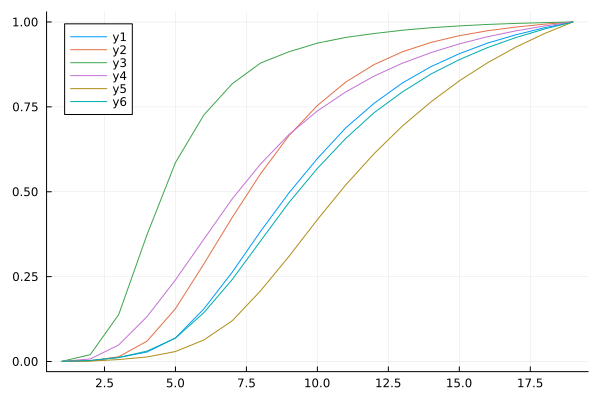

In [53]:
plot(length.(WN["ar"])/length(WN["ar"][end]))
plot!(length.(WN["en"])/length(WN["en"][end]))
plot!(length.(WN["zh"])/length(WN["zh"][end]))
plot!(length.(WN["ja"])/length(WN["ja"][end]))
plot!(length.(WN["ru"])/length(WN["ru"][end]))
plot!(length.(WN["fa"])/length(WN["fa"][end]))


In [49]:
WN_ALL = sum(WN["zh"])

Dict{Tuple{UInt8, Vararg{UInt8}}, Float64} with 758599 entries:
  (0x80, 0x81, 0xe9, 0x99)                         => 1.0
  (0x9c, 0x8b, 0xe5, 0x85, 0xa5, 0xe4, 0xbe)       => 1.0
  (0xe5, 0x85, 0x85, 0xe7, 0x9a, 0x84, 0xe9)       => 1.0
  (0x90, 0x20, 0xe5, 0xae, 0x83, 0xe7, 0x9a)       => 1.0
  (0x86, 0xe4, 0xb9, 0x8b, 0xe8, 0xaf, 0xb4)       => 1.0
  (0x64, 0x6e, 0x61, 0xe5, 0x8d, 0x95, 0xe5, 0x80) => 1.0
  (0x20, 0xe5, 0x92, 0x8c, 0x20, 0x74, 0x72)       => 1.0
  (0xb4, 0xb2, 0xe8, 0x83, 0x8c)                   => 1.0
  (0x92, 0x8c, 0xe5, 0xad, 0xa3, 0xe5, 0xa4, 0xab) => 1.0
  (0x88, 0x89, 0xe8, 0xa1, 0x8c)                   => 11.0
  (0xe5, 0x8c, 0xba, 0x20, 0xe5, 0x9b, 0x9b)       => 1.0
  (0x9c, 0x9d, 0xe7, 0x87, 0x95)                   => 1.0
  (0xb4, 0xe4, 0xbb, 0xa3, 0xe6, 0x97)             => 1.0
  (0x97, 0xb6, 0xe7)                               => 16.0
  (0xaf, 0xe5, 0xbe, 0x88, 0xe8, 0xbc)             => 1.0
  (0x8f, 0x8a, 0x20, 0x6a, 0x75, 0x72)             => 1.0
  (0xe

In [50]:
SWN =sort(WN_ALL|>collect, by=last, rev=true)

758599-element Vector{Pair{Tuple{UInt8, Vararg{UInt8}}, Float64}}:
                                          (0xe5,) => 21535.0
                                          (0xe6,) => 13279.0
                                          (0x20,) => 11795.0
                                          (0xe7,) => 10591.0
                                          (0xe4,) => 8364.0
                                          (0xe8,) => 8011.0
                                          (0xe9,) => 5775.0
                                          (0xb8,) => 5057.0
                                          (0xba,) => 4894.0
                                          (0x9c,) => 3811.0
                                                  ⋮
       (0xe6, 0x96, 0xbc, 0xe5, 0xa4, 0xb1, 0xe6) => 1.0
       (0xa1, 0xe6, 0xb0, 0xb4, 0xe9, 0xad, 0x9a) => 1.0
 (0xe5, 0x92, 0x8c, 0xe5, 0xa1, 0x94, 0xe6, 0x96) => 1.0
             (0xbe, 0xe6, 0x96, 0xbd, 0x20, 0xe9) => 1.0
                         (0xa7, 0xe6, 0x8a, 0x80)

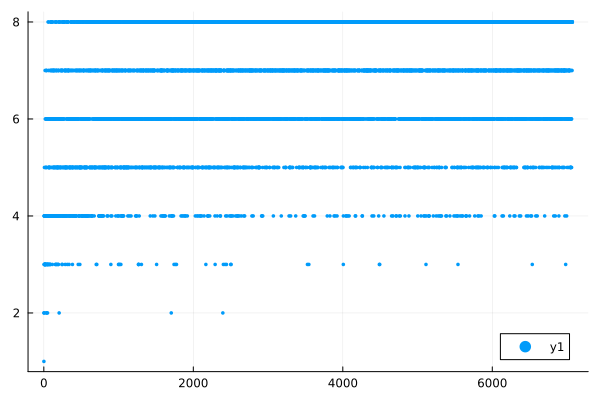

In [21]:
scatter(length.(first.(SWN))[1:100:end], markersize=2, markerstrokewidth=0) # en

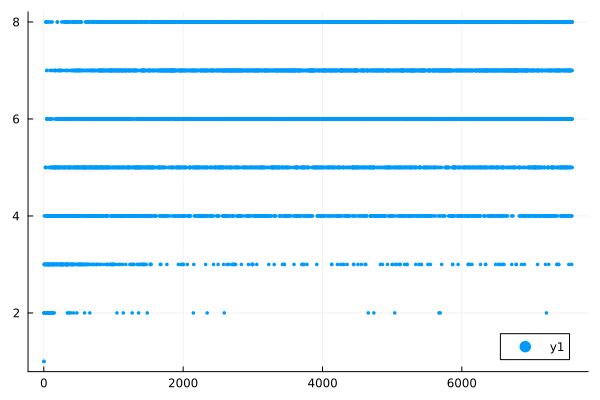

In [24]:
scatter(length.(first.(SWN))[1:100:end], markersize=2, markerstrokewidth=0) # zh

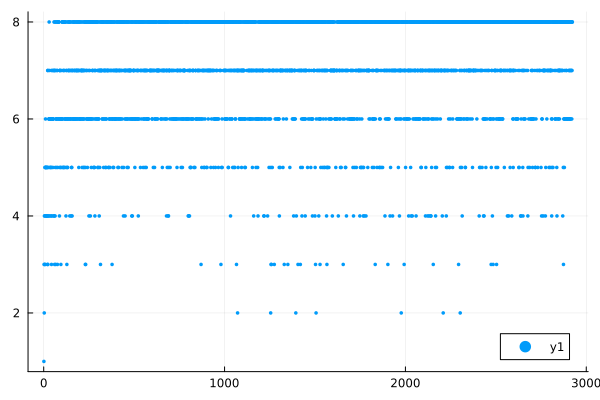

In [29]:
scatter(length.(first.(SWN))[1:100:end], markersize=2, markerstrokewidth=0) # ru


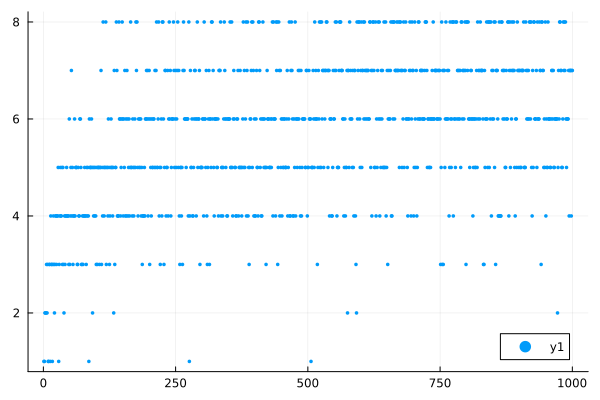

In [45]:
scatter(length.(first.(SWN))[1:10:10000], markersize=2, markerstrokewidth=0) # ru


In [48]:
length.(WN["en"])

8-element Vector{Int64}:
     74
    832
   6584
  28362
  73475
 135834
 200437
 261423

In [28]:
TDS = Dict(l=>TatoebaDataset("corpus/tatoeba", "tatoeba_train.txt", langs=[l])
 for l in ["eng"])

Dict{String, TatoebaDataset} with 1 entry:
  "eng" => ["Let's try something."=>"eng", "I have to go to sleep."=>"eng", "To…

In [44]:
function norm_ngrams_dict(Ds; minfreq=20)
    S = sum(Ds)
    for (k, v) in S
        if v < minfreq
            for D in Ds
                delete!(D, k)
            end
        end
    end
    for D in Ds
        vsum = sum(values(D))
        sc = log(vsum) / vsum
        for (k,v) in D
            D[k] *= sc
        end
    end
    return sum(Ds)
end

function build_ngrams_dict(lang; ngram=5, minfreq=20)
    D1 = TatoebaDataset("corpus/tatoeba", "tatoeba_train.txt", langs=[lang])
    D2 = WikiDataSet("corpus/wikipedia/train", langs=[lang])
    norm_ngrams_dict(merged_dataset_ngrams.([D1, D2], ngram), minfreq=20)
end

build_ngrams_dict (generic function with 3 methods)

In [74]:
GS = Dict(l => build_ngrams_dict(l, ngram=5) for l in LANGS)

Dict{String, Dict{Tuple{Vararg{UInt8}}, Float64}} with 50 entries:
  "epo" => Dict((0x61, 0x64, 0x61, 0x6e, 0x69)=>4.66872e-6, (0x75, 0x20, 0x70, …
  "jpn" => Dict((0x82, 0xa4, 0xe3, 0x83, 0xa1)=>5.77892e-5, (0xe4, 0xbd, 0x93, …
  "kor" => Dict((0xac, 0xec, 0x9e, 0x90)=>0.00106473, (0xeb, 0xaa, 0x85, 0xeb, …
  "ina" => Dict((0x75, 0x72, 0x61, 0x72)=>0.000172068, (0x65, 0x72, 0x20, 0x74,…
  "ron" => Dict((0x6c, 0x6f, 0x72, 0x20, 0xc8)=>0.000331841, (0x75, 0x72, 0x61,…
  "deu" => Dict((0x68, 0x65, 0x6e, 0x64, 0x73)=>3.55698e-6, (0x64, 0x62, 0x6f)=…
  "nds" => Dict((0xb6, 0x6c, 0x76, 0x20)=>0.000125647, (0xb6, 0x72, 0x20, 0x73,…
  "fin" => Dict((0x75, 0x20, 0x70, 0x61, 0x6c)=>5.42321e-5, (0x6f, 0x20, 0x6b, …
  "kab" => Dict((0x75, 0x72, 0x61, 0x72)=>0.00126498, (0x20, 0x74, 0x75, 0x6c, …
  "bel" => Dict((0x8c, 0xd0, 0xba)=>0.00286738, (0xb9, 0xd1, 0x87)=>0.000270606…
  "dan" => Dict((0x20, 0x6b, 0x6f, 0x67)=>0.000110213, (0x64, 0x62, 0x6f)=>0.00…
  "ben" => Dict((0xaf, 0x20, 0xe0, 0xa6, 0

In [75]:
G_sum = sum(values(GS))

Dict{Tuple{Vararg{UInt8}}, Float64} with 910697 entries:
  (0xb6, 0x6c, 0x76, 0x20)       => 0.000125647
  (0x6f, 0x20, 0x6b, 0x65, 0x73) => 7.41131e-5
  (0x74, 0x65, 0x64, 0x20, 0x63) => 0.000189135
  (0x20, 0x74, 0x75, 0x6c, 0x6d) => 2.01197e-5
  (0x6e, 0x65, 0x72, 0x77, 0x6f) => 0.000101672
  (0x74, 0x20, 0x62, 0x6c)       => 0.00613151
  (0x6f, 0x62, 0x65, 0x79, 0x65) => 5.71972e-6
  (0x6d, 0x20, 0x61, 0xc5, 0xad) => 6.50176e-5
  (0x88, 0x89, 0xe8, 0xa1, 0x8c) => 0.00020358
  (0xa5, 0x75, 0x20)             => 0.0017595
  (0x6a, 0x6e, 0x20, 0x61, 0x62) => 5.08067e-6
  (0x97, 0xb6, 0xe7)             => 0.000348498
  (0x6d, 0x20, 0x74, 0x69, 0x6f) => 8.23844e-5
  (0x6f, 0x6e, 0x73, 0x69, 0x6e) => 0.000394307
  (0x20, 0x64, 0x6f, 0x72, 0x66) => 0.00050131
  (0x82, 0x92, 0xe5, 0x90, 0x90) => 2.25952e-5
  (0x72, 0x74, 0x20, 0x6a, 0x65) => 8.70981e-5
  (0x20, 0x74, 0x65, 0x79)       => 0.000142385
  (0xa8, 0xd8, 0xa7, 0x20, 0xd8) => 0.00537505
  ⋮                              => ⋮

In [89]:
dump_ngrams(sorted_G, "ngrams_sum.txt")

In [88]:
sorted_G = sort(G_sum|>collect, by=last, rev=true)

910697-element Vector{Pair{Tuple{Vararg{UInt8}}, Float64}}:
                        (0x20,) => 51.52685249105365
                        (0x61,) => 18.978761545892883
                        (0x65,) => 17.233342754347692
                        (0xd0,) => 13.597930822556203
                        (0x69,) => 13.298226673257851
                        (0x6e,) => 12.888765394422249
                        (0x74,) => 10.400214084931429
                        (0x6f,) => 9.642756451277071
                        (0x72,) => 9.620708503547323
                        (0x73,) => 9.577683449404867
                                ⋮
 (0x6f, 0x61, 0x73, 0x69, 0x61) => 1.17932385090508e-6
 (0x73, 0x65, 0x65, 0x64, 0x6c) => 1.17932385090508e-6
 (0x62, 0x65, 0x67, 0x65, 0x74) => 1.17932385090508e-6
 (0x68, 0x20, 0x6d, 0x6f, 0x6d) => 1.17932385090508e-6
 (0x69, 0x72, 0x6c, 0x6f, 0x63) => 1.17932385090508e-6
 (0x73, 0x61, 0x74, 0x20, 0x71) => 1.17932385090508e-6
       (0x75, 0x74, 0x74, 0x68) => 1.179

In [117]:
G_K = sorted_G[1:10000]

10000-element Vector{Pair{Tuple{Vararg{UInt8}}, Float64}}:
                        (0x20,) => 51.52685249105365
                        (0x61,) => 18.978761545892883
                        (0x65,) => 17.233342754347692
                        (0xd0,) => 13.597930822556203
                        (0x69,) => 13.298226673257851
                        (0x6e,) => 12.888765394422249
                        (0x74,) => 10.400214084931429
                        (0x6f,) => 9.642756451277071
                        (0x72,) => 9.620708503547323
                        (0x73,) => 9.577683449404867
                                ⋮
       (0x20, 0x74, 0xe1, 0xbb) => 0.016063052775747447
       (0x68, 0x61, 0x62, 0x65) => 0.01606208286863988
       (0x20, 0x61, 0x6d, 0x20) => 0.0160619406182455
             (0xec, 0x8b, 0x9c) => 0.0160618832622154
       (0x64, 0x20, 0x74, 0x6f) => 0.01606173535750281
       (0x20, 0x77, 0x6f, 0x72) => 0.016061722695580347
             (0x20, 0x75, 0x64) => 0.0160

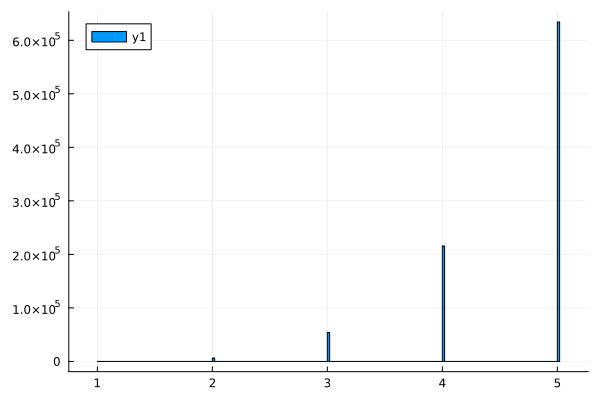

In [92]:
histogram(length.(first.(sorted_G)))

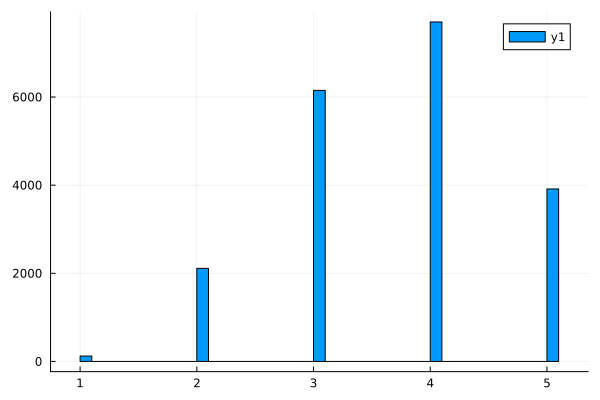

In [116]:
histogram(length.(first.(G_K)))

In [96]:
vocab = first.(G_K)

10000-element Vector{Tuple{UInt8, Vararg{UInt8}}}:
 (0x20,)
 (0x61,)
 (0x65,)
 (0xd0,)
 (0x69,)
 (0x6e,)
 (0x74,)
 (0x6f,)
 (0x72,)
 (0x73,)
 ⋮
 (0x20, 0x74, 0xe1, 0xbb)
 (0x68, 0x61, 0x62, 0x65)
 (0x20, 0x61, 0x6d, 0x20)
 (0xec, 0x8b, 0x9c)
 (0x64, 0x20, 0x74, 0x6f)
 (0x20, 0x77, 0x6f, 0x72)
 (0x20, 0x75, 0x64)
 (0x20, 0xd7, 0xa0, 0xd7, 0x99)
 (0x20, 0x76, 0x72)

In [100]:
dump_vocab(vocab, "vocab.txt")

In [107]:
mkpath("ngrams0")
for (lang, D) in GS
    dump_ngrams( sort(D|>collect, by=last, rev=true), joinpath("ngrams0", lang * ".txt"))
end

In [110]:
sort([lang=>length(D) for (lang, D) in GS], by=last, rev=true)

50-element Vector{Pair{String, Int64}}:
 "eng" => 123433
 "deu" => 99883
 "hun" => 98225
 "jpn" => 94179
 "epo" => 93386
 "tur" => 91570
 "kab" => 89037
 "fra" => 77174
 "spa" => 77115
 "por" => 76271
       ⋮
 "fas" => 11815
 "bel" => 10545
 "bul" => 9707
 "mkd" => 9332
 "kur" => 8668
 "yid" => 7012
 "ben" => 4063
 "mar" => 3950
 "hin" => 3381

In [112]:
vocab = Set(vocab);

In [113]:
GSF = Dict()
for (lang, D) in GS
    DF = Dict(k=>v for (k,v) in D if k in vocab)
    GSF[lang] = DF
end

In [114]:
sort([lang=>length(D) for (lang, D) in GSF], by=last, rev=true)

50-element Vector{Pair{String, Int64}}:
 "deu" => 4657
 "eng" => 4592
 "tur" => 4448
 "hun" => 4418
 "epo" => 4399
 "fra" => 4393
 "spa" => 4352
 "por" => 4304
 "ita" => 4238
 "nld" => 4164
       ⋮
 "heb" => 928
 "ell" => 855
 "fas" => 819
 "kur" => 779
 "ben" => 701
 "hin" => 669
 "mar" => 631
 "yid" => 595
 "kor" => 486

In [119]:
mkpath("ngrams")
for (lang, D) in GSF
    dump_ngrams( sort(D|>collect, by=last, rev=true), joinpath("ngrams", lang * ".txt"))
end